In [ ]:
import numpy as np

img = np.ones((10000, 10000, 1000)) # results in kernel crash
img

In [4]:
import dask
from dask import delayed
import dask.array as da

# dask breaks the big array into smaller blocks called chunks
img = da.ones((10000, 10000, 1000))
img

dask.array<ones_like, shape=(10000, 10000, 1000), dtype=float64, chunksize=(255, 255, 255), chunktype=numpy.ndarray>

In [1]:
from time import sleep

## calculate square of a number
def calculate_square(x):
    sleep(1)
    x = x**2
    return x

## calculate sum of two numbers
def get_sum(a,b):
    sleep(1)
    return a+b

In [2]:
%%time

## calculate square of first number
x = calculate_square(10)

## calculate square of second number
y = calculate_square(20)

## calculate sum of two numbers
z = get_sum(x,y)
print(z)

500
CPU times: user 2.32 ms, sys: 2.8 ms, total: 5.12 ms
Wall time: 3.01 s


<strong>You may notice that even after the intentional delay of three seconds, the entire code took 3.1 seconds to run.

Now it’s time to see how Dask can help in parallelizing this code (initial functions for calculating the square and sum would remain the same).</strong>

In [5]:
%%time
## Wrapping the function calls using dask.delayed
x = delayed(calculate_square)(10)
y = delayed(calculate_square)(20)
z = delayed(get_sum)(x, y)
print(z)

Delayed('get_sum-13652cb2-120a-43ea-bb09-3562213ade6c')
CPU times: user 1.6 ms, sys: 462 μs, total: 2.06 ms
Wall time: 1.81 ms


<strong>z is considered a lazy object of the delayed function. <br><br>
It holds everything that you need to compute the final results, including different functions and their respective inputs. To get the result, you must call the compute() method.</strong>

CPU times: user 14.8 ms, sys: 13.9 ms, total: 28.7 ms
Wall time: 418 ms


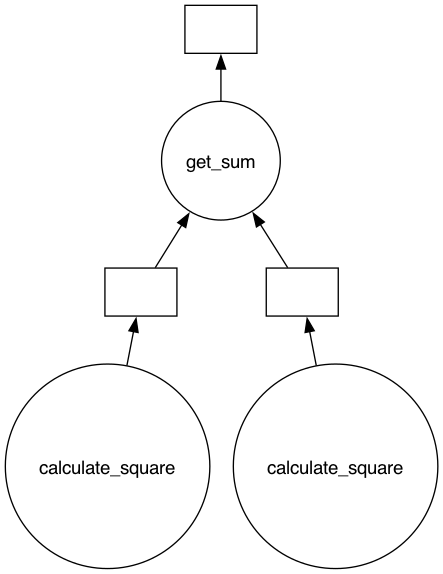

In [6]:
%%time
## visualize the task graph
z.visualize()

In [7]:
%%time
## get the result using compute method
z.compute()

CPU times: user 6.8 ms, sys: 5.24 ms, total: 12 ms
Wall time: 2.02 s


500

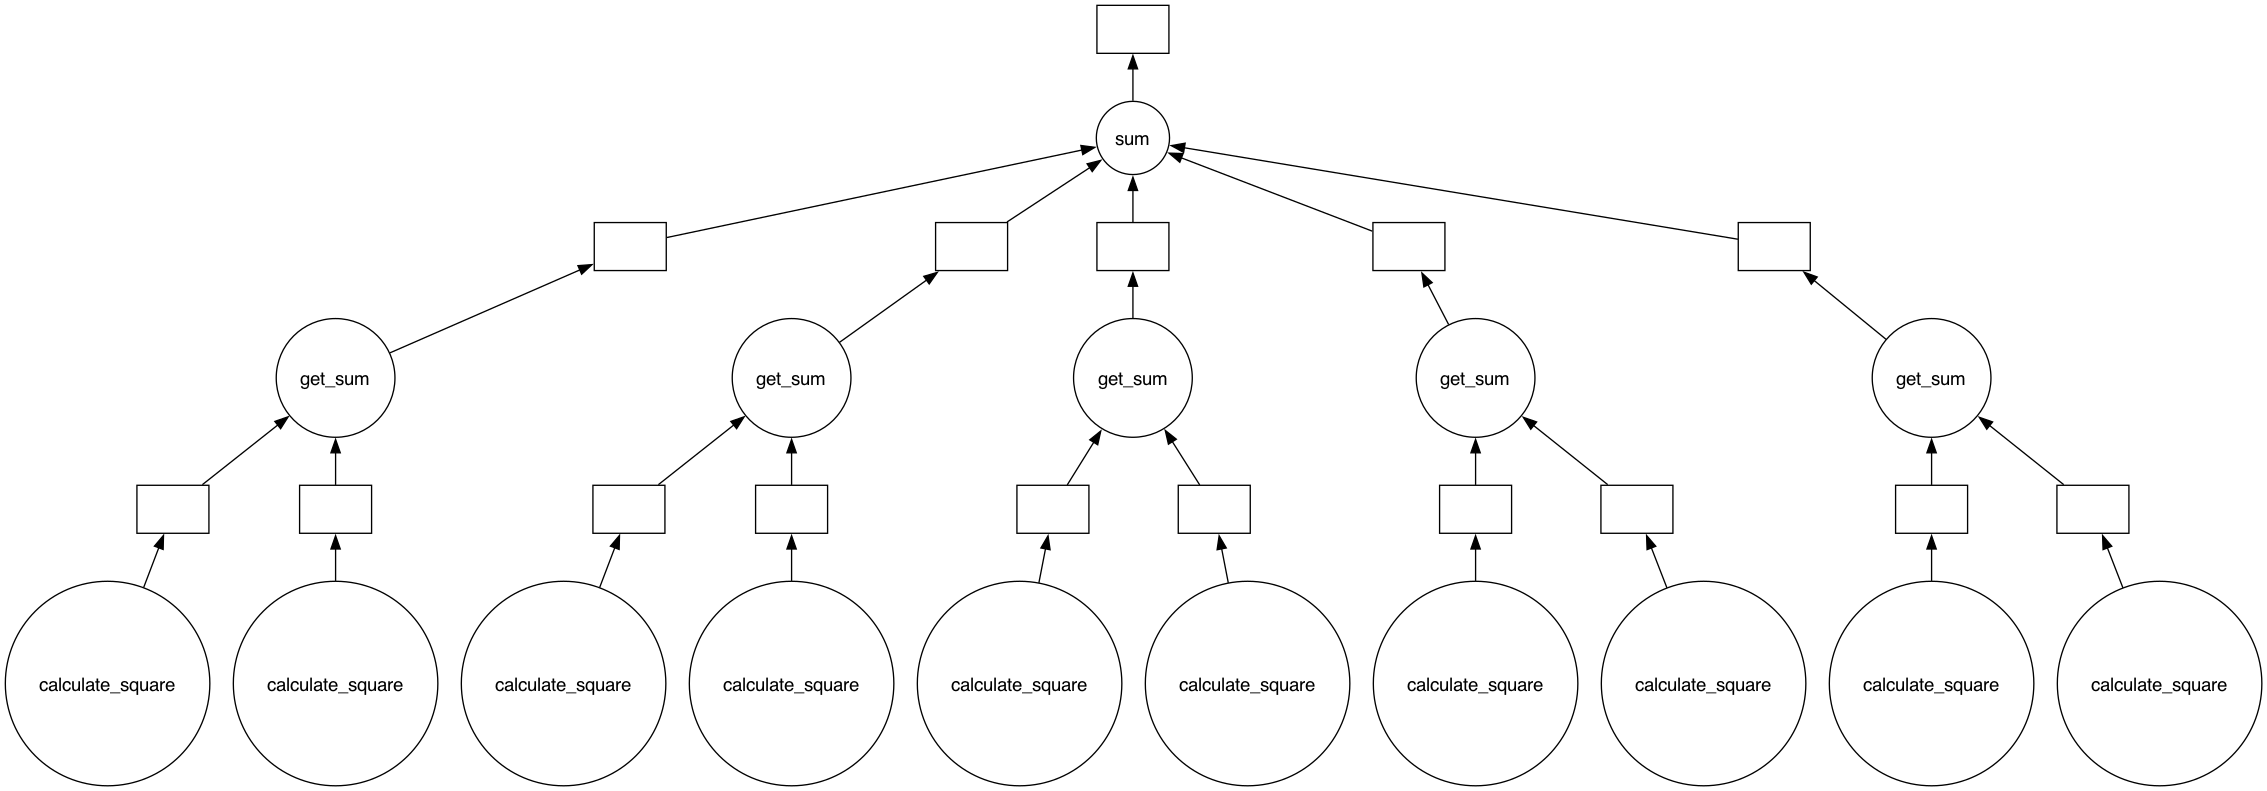

In [9]:
output = []

## iterate over values and calculate the sum
for i in range(5):
    a = delayed(calculate_square)(i)
    b = delayed(calculate_square)(i+10)
    c = delayed(get_sum)(a, b)
    output.append(c)

total = dask.delayed(sum)(output)

## Visualizing the graph
total.visualize()

In [11]:
%%time

# get the total
total.compute()

CPU times: user 8.3 ms, sys: 4.19 ms, total: 12.5 ms
Wall time: 2.02 s


760